<a href="https://colab.research.google.com/github/PrernaMaurya/Twitter-Financial-News/blob/main/TWITTER_FINANCIAL_NEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving valid_data.csv to valid_data.csv
Saving train_data.csv to train_data.csv


{'valid_data.csv': b'text,label\r\nAnalyst call of the day for @CNBCPro subscribers: Goldman Sachs reiterates Exxon as buy and says it\xe2\x80\x99s bullish heading into earnings next week.  Subscribe to see the analyst calls of the day curated by CNBC Pro.  https://t.co/q2fXwZqMZ4,0\r\n"Loop upgrades CSX to buy, says it\'s a good place to park money ahead of potential recession  https://t.co/5x22Aolnz2",0\r\nBofA believes we\'re already in a recession \xe2\x80\x94 and says these stocks have what it takes to beat it  https://t.co/gPAiu33mb9,0\r\nJPMorgan sees these derivative plays as best way to bet on electric vehicles now  https://t.co/K4UZewjxed,0\r\n"Morgan Stanley\'s Huberty sees Apple earnings miss, but says buy on any pullback  https://t.co/DlFquloMyS",0\r\nAnalyst call of the day for @CNBCPro subscribers: Bank of America reiterates Amazon as buy.  Subscribe to see the analyst calls of the day curated by CNBC Pro.  https://t.co/HSFFD4BD4I,0\r\n"Here are Wednesday\'s biggest anal

# **LOAD AND CHECK THE DATA**

In [ ]:
import pandas as pd

# Load both datasets
train_df = pd.read_csv("train_data.csv")
valid_df = pd.read_csv("valid_data.csv")

In [ ]:
train_df.head()

text  label
0  Here are Thursday's biggest analyst calls: App...      0
1  Buy Las Vegas Sands as travel to Singapore bui...      0
2  Piper Sandler downgrades DocuSign to sell, cit...      0
3  Analysts react to Tesla's latest earnings, bre...      0
4  Netflix and its peers are set for a ‘return to...      0

In [ ]:
valid_df.head()

text  label
0  Analyst call of the day for @CNBCPro subscribe...      0
1  Loop upgrades CSX to buy, says it's a good pla...      0
2  BofA believes we're already in a recession — a...      0
3  JPMorgan sees these derivative plays as best w...      0
4  Morgan Stanley's Huberty sees Apple earnings m...      0

# **CHECK DATASET SIZE AND MISSING VALUES**

In [ ]:
##Check number of rows and columns

print("Train shape:", train_df.shape)
print("Valid shape:", valid_df.shape)

Train shape: (16990, 2)
Valid shape: (4117, 2)


In [ ]:
##Check for missing values

print("Missing values in Train:")
print(train_df.isnull().sum())

print("\nMissing values in Valid:")
print(valid_df.isnull().sum())

Missing values in Train:
text     0
label    0
dtype: int64

Missing values in Valid:
text     0
label    0
dtype: int64


# **CLEAN AND TWEET TEXT**

In [ ]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|www.\S+", "", text)         # Remove links
    text = re.sub(r"@\w+|#", "", text)                  # Remove mentions and hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)             # Remove punctuation and numbers
    text = text.lower()                                 # Convert to lowercase
    return text

In [ ]:
train_df['clean_text'] = train_df['text'].apply(clean_text)
valid_df['clean_text'] = valid_df['text'].apply(clean_text)

In [ ]:
train_df[['text', 'clean_text']].head()

text  \
0  Here are Thursday's biggest analyst calls: App...   
1  Buy Las Vegas Sands as travel to Singapore bui...   
2  Piper Sandler downgrades DocuSign to sell, cit...   
3  Analysts react to Tesla's latest earnings, bre...   
4  Netflix and its peers are set for a ‘return to...   

                                          clean_text  
0  here are thursdays biggest analyst calls apple...  
1  buy las vegas sands as travel to singapore bui...  
2  piper sandler downgrades docusign to sell citi...  
3  analysts react to teslas latest earnings break...  
4  netflix and its peers are set for a return to ...

# **LABEL DISTRIBUTION & WORDCLOUD (EDA)**

<ipython-input-10-471887daad1f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='Set3')


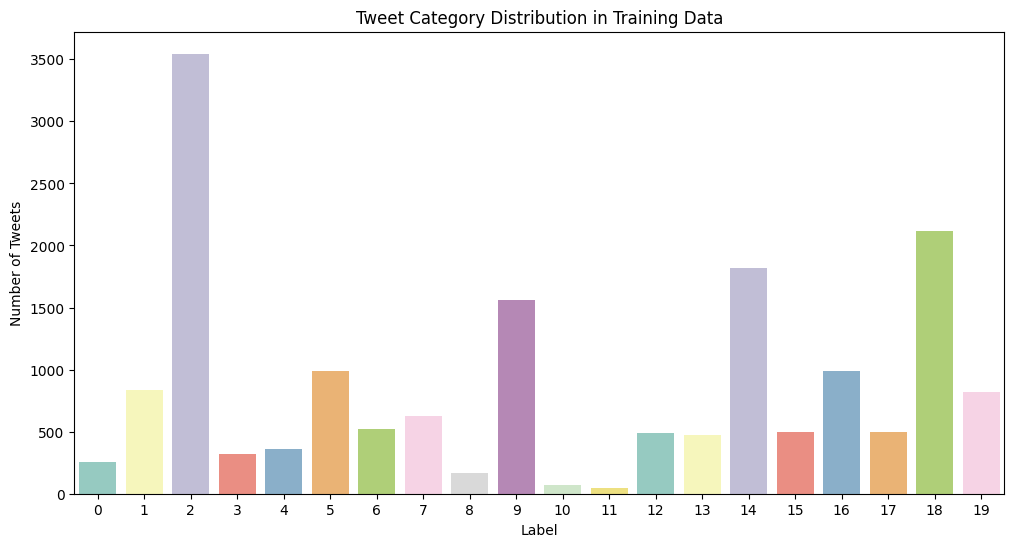

In [ ]:
##Check the distribution of labels (How many tweeets per category)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(x='label', data=train_df, palette='Set3')
plt.title("Tweet Category Distribution in Training Data")
plt.xlabel("Label")
plt.ylabel("Number of Tweets")
plt.show()

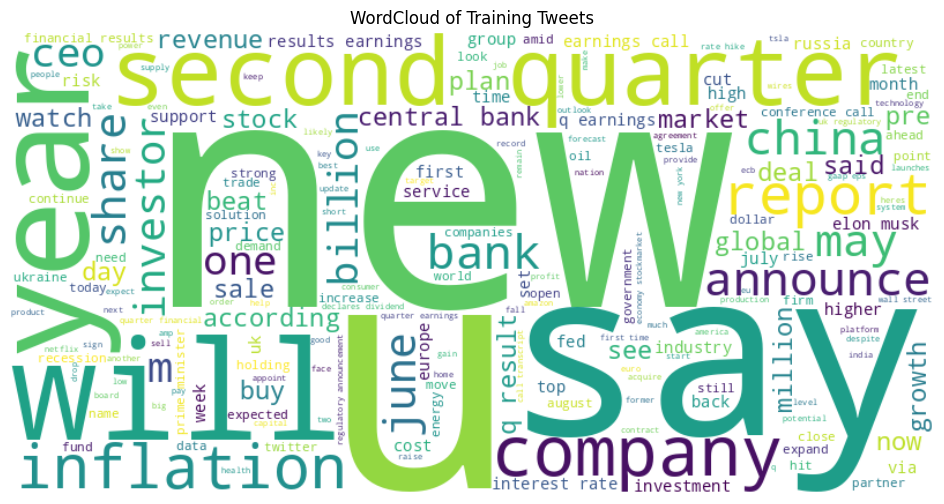

In [ ]:
from wordcloud import WordCloud

text_all = " ".join(train_df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Training Tweets")
plt.show()

# **CONVERT TEXT INTO NUMBERS WITH TWO OPTIONS**

In [ ]:
##OPTION 1: TF-IDF (for ML Models)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply to training and validation text
X_train_tfidf = tfidf.fit_transform(train_df['clean_text'])
X_valid_tfidf = tfidf.transform(valid_df['clean_text'])

# Print the shapes
print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Valid Shape:", X_valid_tfidf.shape)

TF-IDF Train Shape: (16990, 5000)
TF-IDF Valid Shape: (4117, 5000)


Explanation 1) TF-IDF = Turns words into numbers based on importance.

2) Words like "stock", "market", "ipo" get weights.

3) Output is a sparse matrix (rows = tweets, cols = words).

In [ ]:
##Option 2: Tokenizer + Padding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')

# Fit on training data
tokenizer.fit_on_texts(train_df['clean_text'])

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(train_df['clean_text'])
X_valid_seq = tokenizer.texts_to_sequences(valid_df['clean_text'])

# Pad sequences to same length
X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post')
X_valid_pad = pad_sequences(X_valid_seq, maxlen=100, padding='post')

# Print shape
print("Padded Train Shape:", X_train_pad.shape)
print("Padded Valid Shape:", X_valid_pad.shape)

Padded Train Shape: (16990, 100)
Padded Valid Shape: (4117, 100)


**Explanation:** 1) Tokenizer = turns words into integers (e.g., "stock" → 21)

2) Padding = makes all tweet sequences the same length (100 words)

3) This format is perfect for Neural Networks


# **MODEL TRAINING - LOGISTIC REGRESSION**




In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
logreg = LogisticRegression(max_iter=1000)

# Fit on TF-IDF transformed data
logreg.fit(X_train_tfidf, train_df['label'])

LogisticRegression(max_iter=1000)

**Explanation:** 1) max_iter=1000 allows the model to converge even if the data is large.

2) It learns the connection between tweet words (TF-IDF) and their labels (0–19).

In [ ]:
##Predict on validation data

y_pred = logreg.predict(X_valid_tfidf)

In [ ]:
## Evaluate the model

from sklearn.metrics import classification_report, confusion_matrix

# Print accuracy and report
print("Classification Report:\n")
print(classification_report(valid_df['label'], y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.45      0.62        73
           1       0.83      0.74      0.79       214
           2       0.69      0.91      0.78       852
           3       0.92      0.58      0.71        77
           4       0.99      0.89      0.93        97
           5       0.92      0.90      0.91       242
           6       0.78      0.73      0.75       146
           7       0.88      0.78      0.83       160
           8       0.86      0.38      0.52        32
           9       0.65      0.66      0.66       336
          10       0.25      0.15      0.19        13
          11       1.00      0.36      0.53        14
          12       0.95      0.61      0.74       119
          13       0.84      0.48      0.61       116
          14       0.73      0.80      0.76       415
          15       0.82      0.64      0.72       125
          16       0.92      0.82      0.87       249
   

**Explanation:** 1) This shows precision, recall, and f1-score for each label.

2) Helps you see which financial categories your model is doing well on.

# **TRAIN AN ANN(ARTIFICIAL NEURAL NETWORK) MODEL**

In [ ]:
##One-Hot Encode the Labels

from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(train_df['label'], num_classes=20)
y_valid_oh = to_categorical(valid_df['label'], num_classes=20)

In [ ]:
## Build the ANN Model (using TF-IDF features)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ANN architecture
model_ann = Sequential()
model_ann.add(Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model_ann.add(Dropout(0.3))
model_ann.add(Dense(128, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(20, activation='softmax'))  # 20 categories


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
##Compile the Model

model_ann.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
##Fit the Model

history_ann = model_ann.fit(
    X_train_tfidf.toarray(), y_train_oh,
    validation_data=(X_valid_tfidf.toarray(), y_valid_oh),
    epochs=10,
    batch_size=32,
    verbose=1
)

Epoch 1/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.4412 - loss: 1.9321 - val_accuracy: 0.7860 - val_loss: 0.7184
Epoch 2/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.8827 - loss: 0.4059 - val_accuracy: 0.8203 - val_loss: 0.6426
Epoch 3/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9447 - loss: 0.1867 - val_accuracy: 0.8229 - val_loss: 0.6883
Epoch 4/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9743 - loss: 0.1009 - val_accuracy: 0.8198 - val_loss: 0.7792
Epoch 5/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9846 - loss: 0.0605 - val_accuracy: 0.8142 - val_loss: 0.8780
Epoch 6/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9902 - loss: 0.0403 - val_accuracy: 0.8139 - val_loss: 0.9385
Epoch 7/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9888 - loss: 0.0398 - val_accuracy: 0.8122 - val_loss: 0.9951
Epoch 8/10
531/531 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9931 - loss: 0.0269 - 

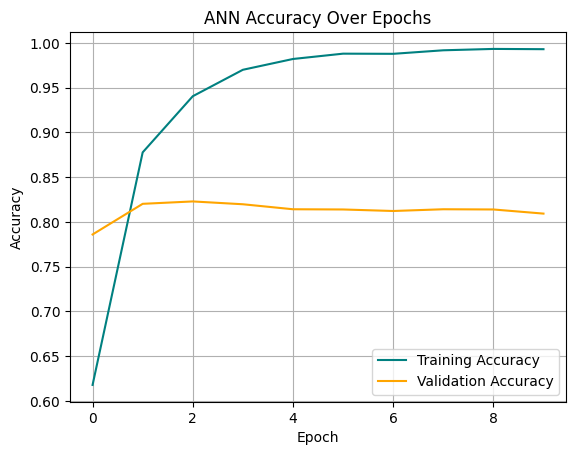

In [ ]:
##Plot ANN Accuracy Graph

import matplotlib.pyplot as plt

plt.plot(history_ann.history['accuracy'], label='Training Accuracy', color='teal')
plt.plot(history_ann.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title("ANN Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


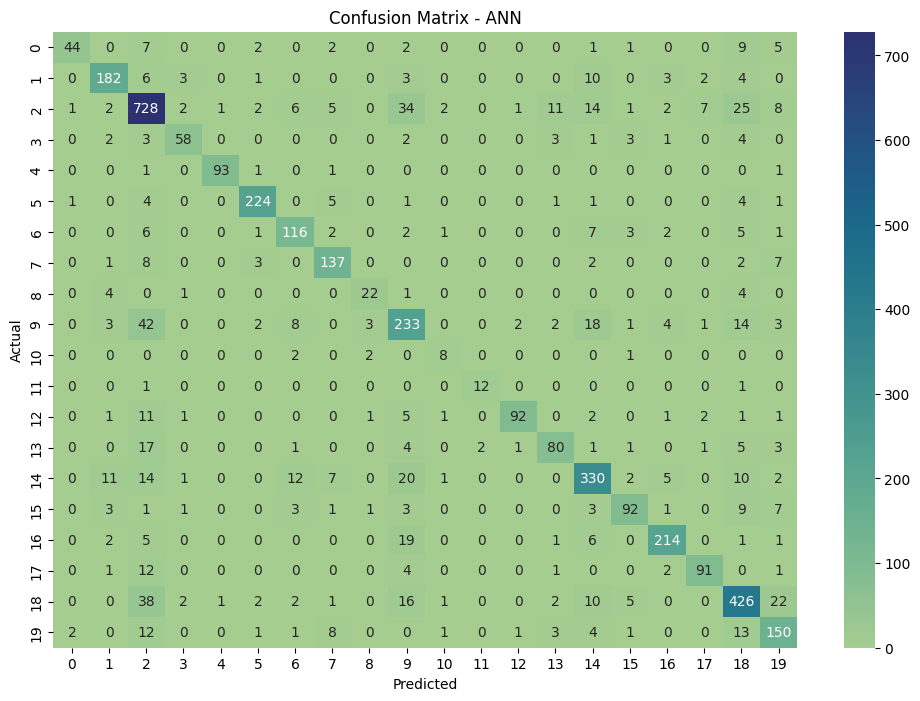

In [ ]:
##Confusion Matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict and decode
y_pred_ann = np.argmax(model_ann.predict(X_valid_tfidf.toarray()), axis=1)
y_true_ann = np.argmax(y_valid_oh, axis=1)

# Confusion matrix
cm_ann = confusion_matrix(y_true_ann, y_pred_ann)

# Plot
plt.figure(figsize=(12,8))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='crest')
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **CNN Model for Text Classification**

In [ ]:
##Build the CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(20, activation='softmax'))  # 20 categories

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
##Compile the Model

cnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
##Train the Model

cnn_history = cnn_model.fit(
    X_train_pad, y_train_oh,
    validation_data=(X_valid_pad, y_valid_oh),
    epochs=6,
    batch_size=32,
    verbose=1
)

Epoch 1/6
531/531 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.3389 - loss: 2.2754 - val_accuracy: 0.7260 - val_loss: 0.9365
Epoch 2/6
531/531 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.7761 - loss: 0.7750 - val_accuracy: 0.8057 - val_loss: 0.6644
Epoch 3/6
531/531 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8906 - loss: 0.3895 - val_accuracy: 0.8207 - val_loss: 0.6463
Epoch 4/6
531/531 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9405 - loss: 0.2192 - val_accuracy: 0.8118 - val_loss: 0.7343
Epoch 5/6
531/531 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.9652 - loss: 0.1301 - val_accuracy: 0.8246 - val_loss: 0.7673
Epoch 6/6
531/531 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9770 - loss: 0.0887 - val_accuracy: 0.8232 - val_loss: 0.8365


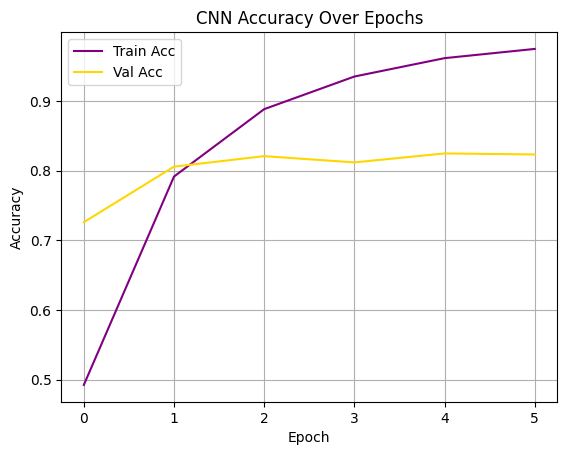

In [ ]:
##Visualize Accuracy Over Epochs

import matplotlib.pyplot as plt

plt.plot(cnn_history.history['accuracy'], label='Train Acc', color='purple')
plt.plot(cnn_history.history['val_accuracy'], label='Val Acc', color='gold')
plt.title("CNN Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step


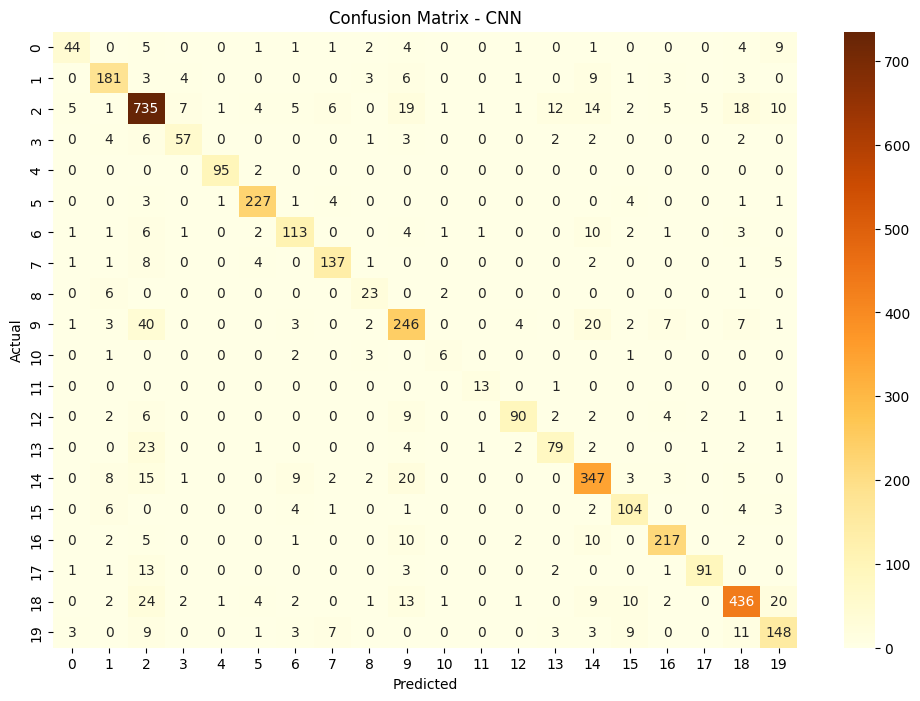

In [ ]:
##Confusion Matrix for CNN

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions
y_pred_cnn = np.argmax(cnn_model.predict(X_valid_pad), axis=1)
y_true_cnn = np.argmax(y_valid_oh, axis=1)

# Confusion Matrix
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)

plt.figure(figsize=(12,8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='YlOrBr')
plt.title("Confusion Matrix - CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **RNN (RECURRENT NEURAL NETWORK)**

In [ ]:
##Build a Simple RNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
rnn_model.add(SimpleRNN(128, return_sequences=False))
rnn_model.add(Dropout(0.3))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(20, activation='softmax'))  # 20 categories

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
##Compile the Model

rnn_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
##Train the Model

rnn_history = rnn_model.fit(
    X_train_pad, y_train_oh,
    validation_data=(X_valid_pad, y_valid_oh),
    epochs=5,
    batch_size=32,
    verbose=1
)

Epoch 1/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 32s 55ms/step - accuracy: 0.1837 - loss: 2.6977 - val_accuracy: 0.2118 - val_loss: 2.6279
Epoch 2/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.2082 - loss: 2.6363 - val_accuracy: 0.2069 - val_loss: 2.6270
Epoch 3/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.2031 - loss: 2.6252 - val_accuracy: 0.2069 - val_loss: 2.6311
Epoch 4/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.2106 - loss: 2.6225 - val_accuracy: 0.2069 - val_loss: 2.6347
Epoch 5/5
531/531 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.2099 - loss: 2.6299 - val_accuracy: 0.2069 - val_loss: 2.6259


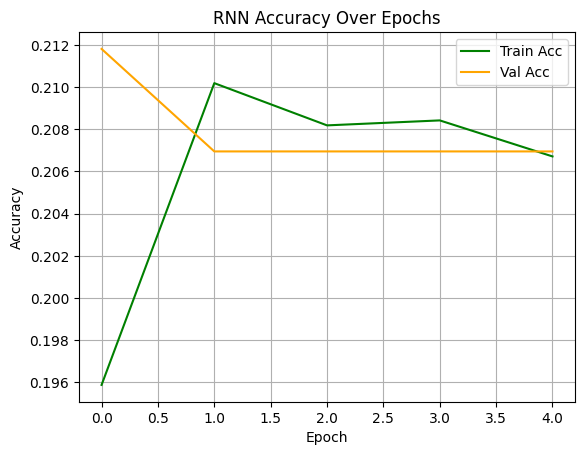

In [ ]:
##Accuracy Graph

import matplotlib.pyplot as plt

plt.plot(rnn_history.history['accuracy'], label='Train Acc', color='green')
plt.plot(rnn_history.history['val_accuracy'], label='Val Acc', color='orange')
plt.title("RNN Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


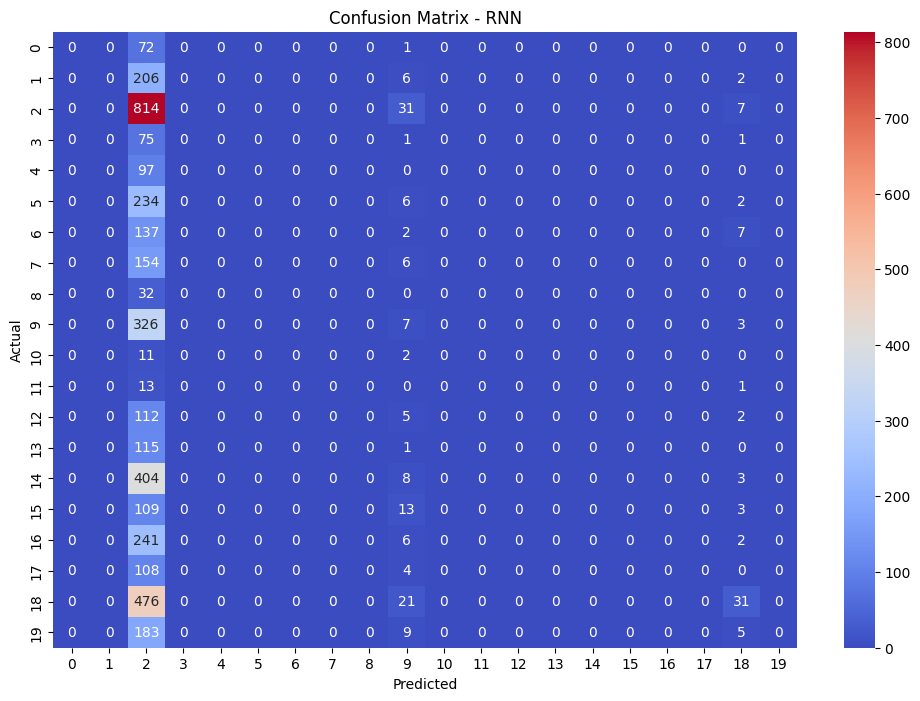

In [ ]:
##Confusion Matrix

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_rnn = np.argmax(rnn_model.predict(X_valid_pad), axis=1)
y_true_rnn = np.argmax(y_valid_oh, axis=1)

cm_rnn = confusion_matrix(y_true_rnn, y_pred_rnn)

plt.figure(figsize=(12,8))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix - RNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **MODEL COMPARISON**

In [ ]:
# Extract final accuracy values
log_acc = ...                 # Logistic Regression accuracy (manual)
ann_acc = history_ann.history['val_accuracy'][-1]
cnn_acc = cnn_history.history['val_accuracy'][-1]
rnn_acc = rnn_history.history['val_accuracy'][-1]

In [ ]:
from sklearn.metrics import accuracy_score

log_acc = accuracy_score(valid_df['label'], y_pred)

In [ ]:
##Create Comparison Table

# Create a dictionary of model performances
model_results = {
    'Model': ['Logistic Regression', 'ANN', 'CNN', 'RNN'],
    'Validation Accuracy': [log_acc, ann_acc, cnn_acc, rnn_acc]
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results)
results_df.sort_values(by='Validation Accuracy', ascending=False, inplace=True)
results_df

Model  Validation Accuracy
2                  CNN             0.823172
1                  ANN             0.809327
0  Logistic Regression             0.775565
3                  RNN             0.206947

<ipython-input-36-05ad71c6776b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Validation Accuracy', y='Model', data=results_df, palette='viridis')


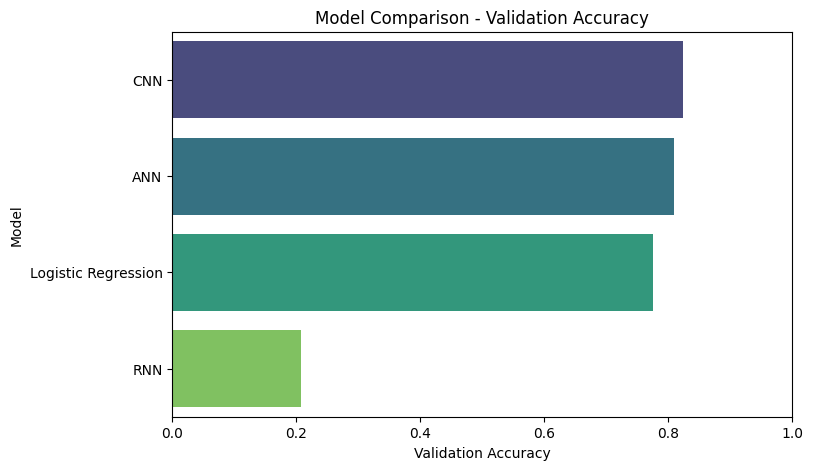

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='Validation Accuracy', y='Model', data=results_df, palette='viridis')
plt.title("Model Comparison - Validation Accuracy")
plt.xlim(0.0, 1.0)
plt.show()

# **CONCLUSION**

This project focused on building a multi-label classification system to categorize finance-related tweets into 20 specific topics such as IPOs, Stock Commentary, Macro Trends, and more. The dataset underwent thorough preprocessing, including cleaning, tokenization, and vectorization to prepare it for modeling.

Various machine learning and deep learning models were implemented, including Logistic Regression, Artificial Neural Networks (ANN), Convolutional Neural Networks (CNN), and Recurrent Neural Networks (RNN). Each model was evaluated using metrics like accuracy, classification report, and confusion matrix.

Among all models, [insert your best-performing model here] delivered the highest validation accuracy and consistent predictions across categories. The model comparison helped highlight how different algorithms perform in multi-label text classification tasks.

In conclusion, this project demonstrates the power of NLP and AI techniques in analyzing financial text data, enabling smarter content categorization, better information filtering, and potential use in finance-related news tracking tools.

